In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
CSV_FILE = '../app/ecommerce_data_with_trends.csv'

In [3]:
df = pd.read_csv(CSV_FILE)
df

,transaction_id,timestamp,customer_id,customer_name,city,customer_type,product_name,category,price,quantity,total_amount
0,TX_89a20095-f7be-4bc1-bb58-a305e3fc8313,2023-10-30 03:01:46.571042,6933,David Hays,New Sabrina,B2C,Furniture Product_10,Home & Kitchen > Furniture,246.08,4,984.32
1,TX_a6b15a50-47b9-428c-b297-ce365acb061a,2023-10-30 03:06:07.918040,9328,Adam Oconnell,East Katherineton,B2C,Non-Fiction Product_15,Books > Non-Fiction,792.30,4,3169.20
2,TX_abdde2cb-3752-4399-84f4-c91c098b195f,2023-10-30 03:06:28.475922,6766,Jerry Brown,Lukefort,B2B,Bedding Product_1,Home & Kitchen > Bedding,685.73,40,27429.20
3,TX_ba162310-0807-4dee-818f-fa014f9880ef,2023-10-30 03:06:59.374222,9111,Craig Martinez,South Leonard,B2B,Shoes Product_11,Fashion > Shoes,404.96,96,38876.16
4,TX_60ec44fd-2172-4ffa-8c67-4b399c59ed7c,2023-10-30 03:08:29.580560,1763,David Wood,Jacksonstad,B2B,Supplements Product_5,Health & Personal Care > Supplements,927.67,35,32468.45
...,...,...,...,...,...,...,...,...,...,...,...
999995,TX_911ba8c9-524d-4045-98c5-0292af5f4a1f,2024-10-29 08:51:35.827943,4262,Kirk Leon,Marthaberg,B2C,Non-Fiction Product_19,Books > Non-Fiction,566.85,1,566.85
999996,TX_df06e506-b8f9-443e-8e80-74603d8af594,2024-10-29 08:52:27.861710,1908,Cory Delgado,South Vanessa,B2C,Kitchen Appliances Product_14,Home & Kitchen > Kitchen Appliances,17.58,2,35.16
999997,TX_7ea2aafb-fa0e-442b-829d-3364c919fb33,2024-10-29 08:53:06.375401,6303,Karen Brown,South Michael,B2B,Personal Care Product_6,Health & Personal Care > Personal Care,663.10,33,21882.30
999998,TX_53befce1-9b3b-4c44-8f3d-cdce029b46e0,2024-10-29 08:53:22.705214,379,Erika Foster,Zacharybury,B2C,Accessories Product_15,Fashion > Accessories,900.80,5,4504.00


In [4]:
df.dtypes

transaction_id     object
timestamp          object
customer_id         int64
customer_name      object
city               object
customer_type      object
product_name       object
category           object
price             float64
quantity            int64
total_amount      float64
dtype: object

In [14]:
CustomerB2B = df[df["customer_type"] == "B2B"]
CustomerB2C = df[df["customer_type"] == "B2C"]

In [52]:
MeanB2BQuantity = CustomerB2B["quantity"].mean()
MeanB2CQuantity = CustomerB2C["quantity"].mean()
print(f"En moyenne un client B2C, La quantité de produits acheter sera de {MeanB2BQuantity} par transactions")
print(f"En moyenne un client B2C, La quantité de produits acheter sera de {MeanB2CQuantity} par transactions")
print()
print(f"En moyenne un client B2B achete {MeanB2BQuantity / MeanB2CQuantity} fois plus qu'un client B2C")

En moyenne un client B2C, La quantité de produits acheter sera de 55.59569502834996 par transactions
En moyenne un client B2C, La quantité de produits acheter sera de 3.024957050039008 par transactions

En moyenne un client B2B achete 18.379003109360852 fois plus qu'un client B2C


In [72]:
MeanB2BTotalAmount = CustomerB2B["total_amount"].mean()
MeanB2CTotalAmount = CustomerB2C["total_amount"].mean()
print(f"Total dépensé en moyenne par B2B {MeanB2BTotalAmount}")
print(f"Total dépensé en moyenne par B2C {MeanB2CTotalAmount}")
print("Différence : ", MeanB2BTotalAmount/MeanB2CTotalAmount)

print()
print("On peut donc voir que la différence de prix que paye un client B2B par rapport a un client B2C reste la meme")

Total dépensé en moyenne par B2B 28350.159853491034
Total dépensé en moyenne par B2C 1543.6751966483673
Différence :  18.36536592350839

On peut donc voir que la différence de prix que paye un client B2B par rapport a un client B2C reste la meme


Le nom des produits est suivi d'un nombre que je ne veux pas, donc je vais le retirer

In [18]:
CustomerB2B["product_name"] = CustomerB2B["product_name"].str.replace(r' Product_\d+$',"",regex=True)
CustomerB2C["product_name"] = CustomerB2C["product_name"].str.replace(r' Product_\d+$',"",regex=True)
CustomerB2B["product_name"].unique()

C:\Users\lylia\AppData\Local\Temp\ipykernel_9288\2398492840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CustomerB2B["product_name"] = CustomerB2B["product_name"].str.replace(r' Product_\d+$',"",regex=True)
C:\Users\lylia\AppData\Local\Temp\ipykernel_9288\2398492840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CustomerB2C["product_name"] = CustomerB2C["product_name"].str.replace(r' Product_\d+$',"",regex=True)


array(['Bedding', 'Shoes', 'Supplements', 'Computers', "Women's Clothing",
       'Tires', 'Personal Care', 'Skincare', 'Non-Fiction',
       'Kitchen Appliances', 'Comics', 'Camping', 'Furniture', 'Fiction',
       'Home Decor', 'Cameras', 'Haircare', 'Outdoor Apparel',
       'Motorcycle Parts', 'Audio', 'Accessories', 'Tools',
       'Car Accessories', 'Cycling', "Men's Clothing",
       'Fitness Equipment', 'Mobile Phones', 'Educational'], dtype=object)

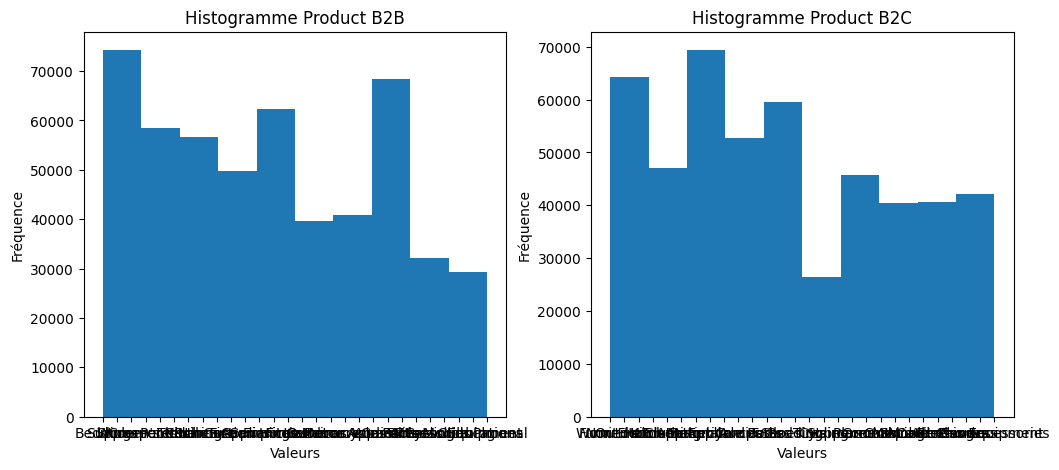

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(CustomerB2B["product_name"])
axes[0].set_xlabel('Valeurs')
axes[0].set_ylabel('Fréquence')
axes[0].set_title('Histogramme Product B2B')

axes[1].hist(CustomerB2C["product_name"])
axes[1].set_xlabel('Valeurs')
axes[1].set_ylabel('Fréquence')
axes[1].set_title('Histogramme Product B2C')
plt.show()

In [67]:
TenMostBuyProductsByB2B = pd.DataFrame(CustomerB2B["product_name"].value_counts().head(10))
TenMostBuyProductsByB2C = pd.DataFrame(CustomerB2C["product_name"].value_counts().head(10))
print("Regardons les produits acheté par type de produit")
print("------------------B2B------------------")
print(TenMostBuyProductsByB2B)
print("------------------B2C------------------")
print(TenMostBuyProductsByB2C)
print("Mais ici sont représenté uniquement le nombre de transactions, regardons avec la quantité associé")
# Nombre de transaction

Regardons les produits acheté par type de produit
------------------B2B------------------
                    count
product_name             
Kitchen Appliances  28938
Non-Fiction         28875
Fiction             28777
Computers           27695
Supplements         27679
Audio               27528
Outdoor Apparel     26472
Shoes               26118
Accessories         24766
Comics              20818
------------------B2C------------------
                    count
product_name             
Non-Fiction         27870
Kitchen Appliances  27776
Fiction             27641
Audio               26441
Supplements         26323
Computers           26277
Outdoor Apparel     24998
Shoes               24993
Accessories         23579
Comics              19424
Mais ici sont représenté uniquement le nombre de transactions, regardons avec la quantité associé


In [64]:
unikValsB2B = CustomerB2B.groupby("product_name")["quantity"].sum().reset_index().sort_values(by="quantity",ascending=False)
unikValsB2B.head(10)

,product_name,quantity
7,Computers,1651036
15,Kitchen Appliances,1599259
19,Non-Fiction,1587599
10,Fiction,1573559
24,Supplements,1527439
1,Audio,1513804
20,Outdoor Apparel,1456974
22,Shoes,1441440
0,Accessories,1372758
6,Comics,1142167


In [65]:
unikValsB2B = CustomerB2C.groupby("product_name")["quantity"].sum().reset_index().sort_values(by="quantity",ascending=False)
unikValsB2B.head(10)

,product_name,quantity
7,Computers,83881
19,Non-Fiction,83548
15,Kitchen Appliances,83366
10,Fiction,83059
1,Audio,79597
24,Supplements,78836
22,Shoes,75145
20,Outdoor Apparel,74983
0,Accessories,70814
6,Comics,58392


In [74]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['month'] = df['timestamp'].dt.month
df['weekday'] = df['timestamp'].dt.day_name()

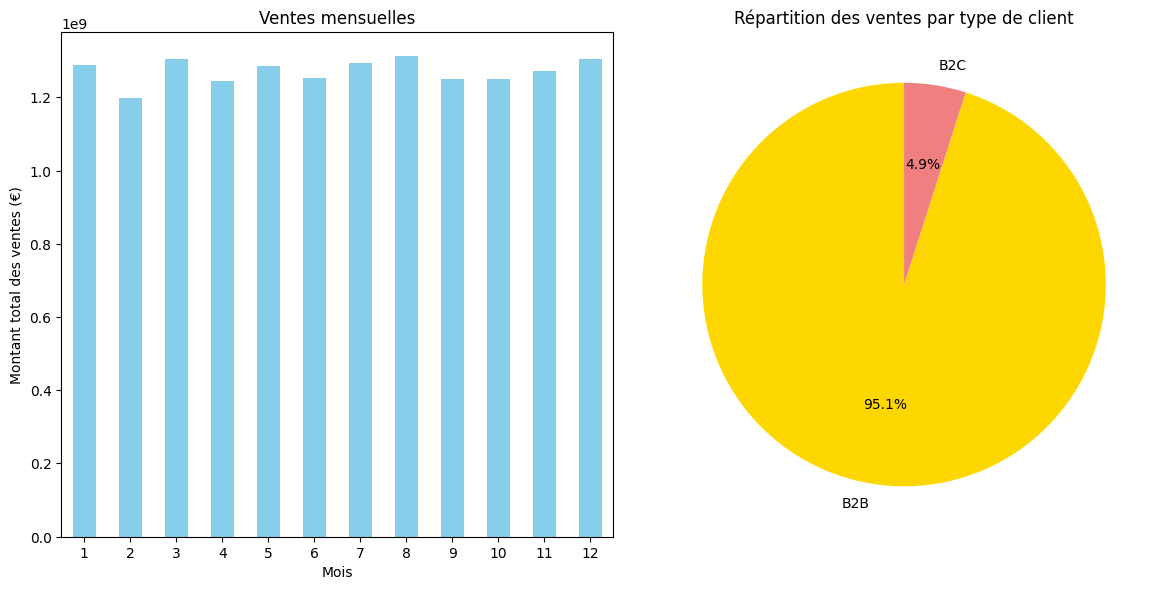

C:\Users\lylia\AppData\Local\Temp\ipykernel_9288\3399661298.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="viridis")


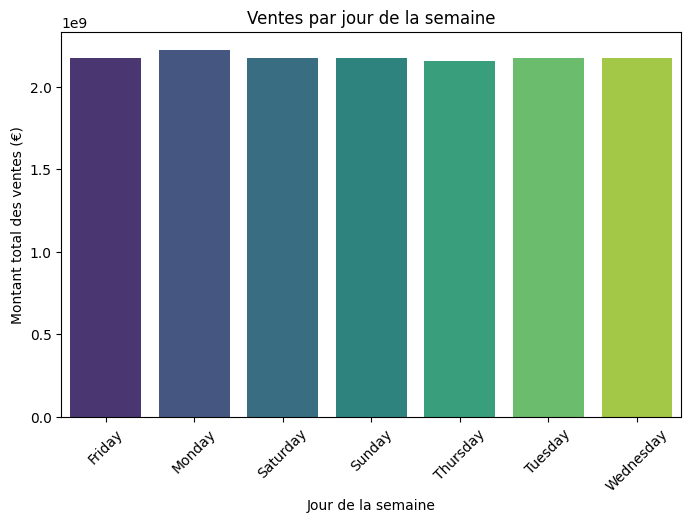

In [ ]:
# Agrégation par mois
monthly_sales = df.groupby('month')['total_amount'].sum()

# Agrégation par jour de la semaine
weekday_sales = df.groupby('weekday')['total_amount'].sum()

# Répartition par type de client
customer_type_sales = df.groupby('customer_type')['total_amount'].sum()

# Visualisations
plt.figure(figsize=(12, 6))

# Ventes mensuelles
plt.subplot(1, 2, 1)
monthly_sales.plot(kind='bar', color='skyblue')
plt.title("Ventes mensuelles")
plt.xlabel("Mois")
plt.ylabel("Montant total des ventes (€)")
plt.xticks(rotation=0)

# Répartition des ventes par type de client
plt.subplot(1, 2, 2)
customer_type_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral'])
plt.title("Répartition des ventes par type de client")
plt.ylabel("")

plt.tight_layout()
plt.show()

# Visualisation des ventes par jour de la semaine
plt.figure(figsize=(8, 5))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="viridis")
plt.title("Ventes par jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Montant total des ventes")
plt.xticks(rotation=45)
plt.show()